In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
import torch
from sklearn.datasets import make_regression
import numpy as np

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
X_train = Tensor(X)
print(type(X_train), X_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)


In [4]:
X_train[0:2].data

array([[ 0.95927083,  0.02451017,  0.4979983 ,  1.4511436 ,  2.1531825 ],
       [-0.07443343, -1.5702248 , -0.72713715, -0.24751863,  0.6206721 ]],
      dtype=float32)

In [5]:
X_train[0].shape

(5,)

In [6]:
class TinyNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,16)
        self.l3 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        x = x.relu()
        x = self.l3(x)
        return x
        
net = TinyNet()

In [8]:
res = net(X_train[0])
res

Tensor: __add__
data: 
[-7.138519]
dtype: float32

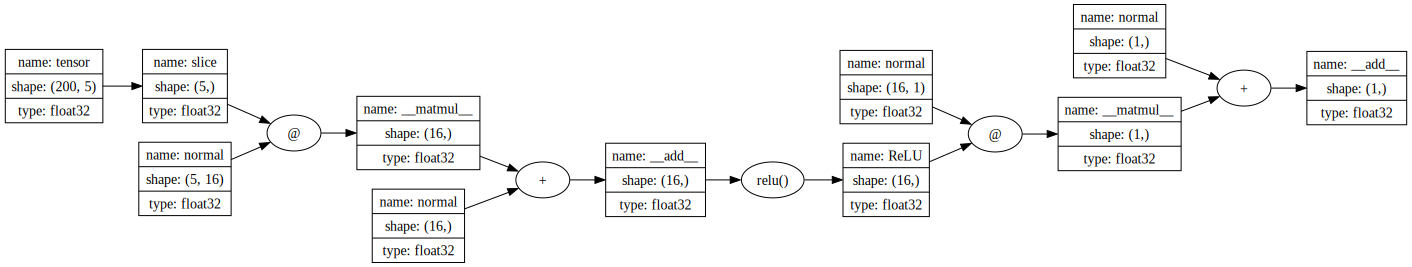

In [9]:
draw_dot(res)